# NoteBook 필사 ([데이터 분석 어떻게 시작해야 하나요?](https://www.kaggle.com/daehungwak/guide-kor-dg))

## Contents → 필사 부분 위주
1. 데이터 셋 확인
2. EDA [탐색적 데이터 분석]
3. Feature Engineering [특성 공학]
4. 모델 개발 및 학습  
  A. RandomForest  
  B. NN모델
5. 모델 예측 및 평가
6. 결론

## 1. 데이터 셋 확인
> - 데이터 구성 확인
- 비정제된 데이터 결측치 처리 방법 고안


In [1]:
# [기본 세팅]

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn

plt.style.use('seaborn') # matplotlib 보다 seaborn scheme을 사용하기 위함
sns.set(font_scale=2.5) # graph, font-size를 일일히 지정 안하기 위함

# visualization for missing value → seaborn으로도 가능
import missingno as msno

# ignore warnings [optional]
import warnings
warnings.filterwarnings('ignore')

# %matplotlib inline # %: IPython 에서 제공하는 Rich output 에 대한 표현 방식
# ※ 도표와 같은 그림, 소리, 애니메이션 과 같은 결과물들을 Rich output 이라 함
# ∴ 즉, 실행 브라우저에서 바로 그래프 등을 볼 수 있게 하는 명령어

In [18]:
# [google Colab 환경 설정]
from google.colab import drive
drive.mount('/content/drive/')

# os.chdir('drive/MyDrive/Colab Notebooks/Kaggle_Study/NoteBook/titanic/submission')
!pwd

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab Notebooks/Kaggle_Study/NoteBook/titanic/submission


In [21]:
# [kaggle에서 데이터 불러오기]

os.listdir("../input") # input 폴더에 있는 파일 보기 → 보통 train, test, sample_submission으로 이루어짐

df_train = pd.read_csv("../input/train.csv")
df_test = pd.read_csv("../input/test.csv")
df_submit = pd.read_csv("../input/sample_submission.csv")

데이터를 살펴보면 알겠지만 다음과 같은 열을 가지고 있음을 알 수 있다.
```python
>>> ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
```

데이터를 살펴볼 때  
count 값이 다른 feature → 결측치(Null)가 있음을 의심해봐야 된다.

In [10]:
# 1. 데이터 살펴보기(Jupyter NoteBook에서는 print()대신 Ctrl+Enter로 바로바로 출력하는 습관 들이자)
# 1.0 열&행 수, 열 list, 몇개의 데이터 미리보기(head()), data tpye, 통계치
df_train.shape, df_test.shape, df_submit.shape
df_train.columns # df_test.columns 도 동일할 것임
df_submit.columns # features와 target 데이터를 포함한 파일 → 최종파일 제출 시 어떤 걸 포함해야되는지 살펴보는 과정

df_train.head # 각 features에 대한 설명 텍스트 정리
df_test.head
df_submit.head

df_train.dtypes

df_train.describe() # features 통계치 return (count, mean, std, min~max, quarter)
df_test.describe()
## count 값이 다른 feature → 결측치(Null)가 있음을 의심해봐야 된다.

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


우리가 다루는 문제에서 **feature**는 Pclass, Age,  SibSp, Parch, Fare 이며,  
예측하려는 **target label** 은 Survived 입니다.

#### 타이타닉 데이터 Feature 설명
- survival - 생존유무, target 값. (0 = 사망, 1 = 생존)
- pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)
- sex - 성별
- Age - 나이(세)
- sibsp - 함께 탑승한 형제자매, 배우자 수 총합
- parch - 함께 탑승한 부모, 자녀 수 총합
- ticket - 티켓 넘버
- fare - 탑승 요금
- cabin - 객실 넘버
- bembarked - 탑승 항구

### 1.1 결측치 확인
> **내생각**: Notebook에서는 train, test data 각각 전체에 대한 각 열의 Null data분포를 보기 위해
```python
df_train.isnull().sum() / df_train.shape()
```
이렇게 수행하였지만
- Q. 소수 6째 자리까지 표시되는 거 같은 데 만약에 적은 수치로 null값을 가지고 있어 발견되지 못할 수 있는 위험은 없는지
- Q. 비율로 말고 그냥 각 열에 대한 결측 데이터 행 수로 찾아 본는 게 *나은지*
>  
>궁금했다.

In [11]:
# 1.1 결측치(Null Data) 확인 - 비율
df_train.isnull().sum() / df_train.shape[0]
df_test.isnull().sum() / df_test.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

### 1.2 target label(Survived)
target label이 어떤 **distribution**을 가지고 있는 지 확인 해봐야한다.

titanic data의 경우 binary classification이라서 <u>1과 0의 분포가 어떤 지에 따라 모델 평가 방법</u>이 달라질 수 있다.

Ex. 100 중 1:99%, 0:1% 같이 1에 편향된 데이터에서 0을 찾는 문제라면 원하는 결과를 찾기 힘들것이다.

하지만 titanic data는 비교적 균등한 편이므로 따로 신경 쓰지 않아도 되는 부분이다.

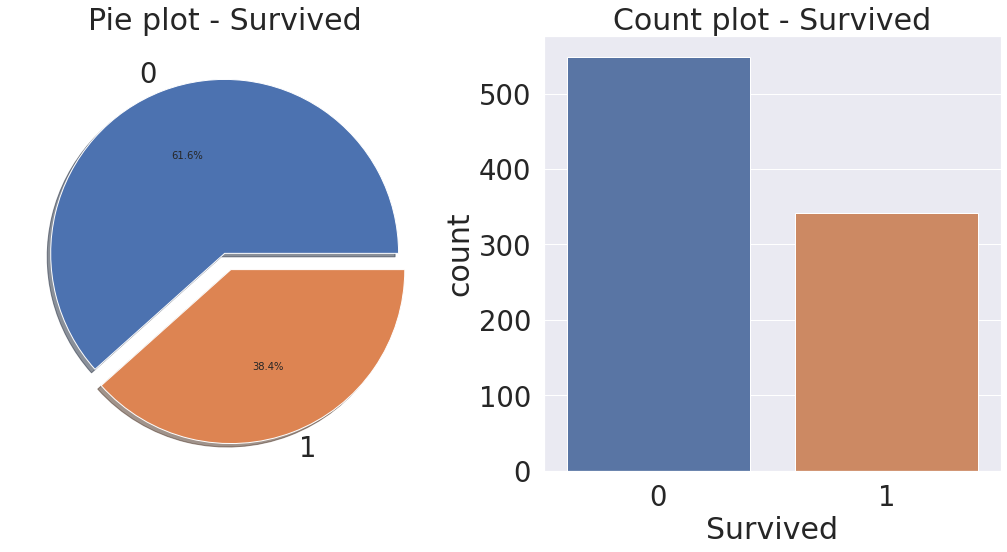

In [15]:
# 1.2 target label("Survived") 확인
f, ax = plt.subplots(1, 2, figsize=(18, 8)) # 그래프 캔버스 구간 나눔 및 사이즈 설정
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1],
autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

---
## 2. EDA
탐색적 데이터 분석(EDA, Exploratory Data Analysis)

본격적인 데이터 분석이 이루어지는 부분. 이 많은 데이터 속에 **숨겨진 사실**을 찾기 위해선 <u>적절한 시각화</u>가 필요

### 2.1 Plass
- 서수형 데이터 (순서가 있는 dtype)
- Pclass에 따른 생존률의 차이 (pivot 또는 crosstab이용)
    ```python
    # pivot Table
    df_train[["Pclass", "Survived"]].groupby(["Plcass"], as_index=True).count()
    df_train[["Pclass", "Survived"]].groupby(["Plcass"], as_index=True).sum()
    df_train[["Pclass", "Survived"]].groupby(["Plcass"], as_index=True).mean() # → 생존률

    #crosstab
    pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)
    ```
- pandas 간단 시각화
```python
df_train[["Pclass", "Survived"]].groupby(["Plcass"], as_index=True).mean().plot.bar()
```

⇒ 생각보다 <u>Pclass가 생존에 큰 영향을 미친다</u>고 생각해 볼 수 있다.

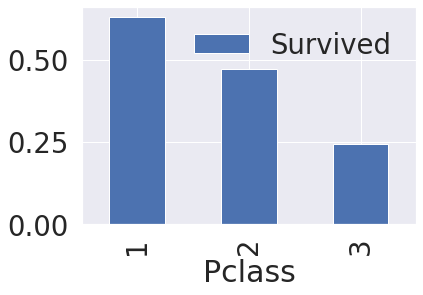

In [23]:
# pivot Table
df_train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).count()
df_train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).sum()
df_train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean() # → 생존률

# crosstab
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

# pandas 간단 시각화
df_train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean().plot.bar()

### 2.2 Sex
- 남자와 여자의 절대 생존자 수를 비교
- 각 남자와 여자의 생존률을 비교

⇒ 두 그래프 모두 여자 성별이 유리하다는 것을 확인 할 수 있다. (Sex feature는 상관성이 있다고 본다)


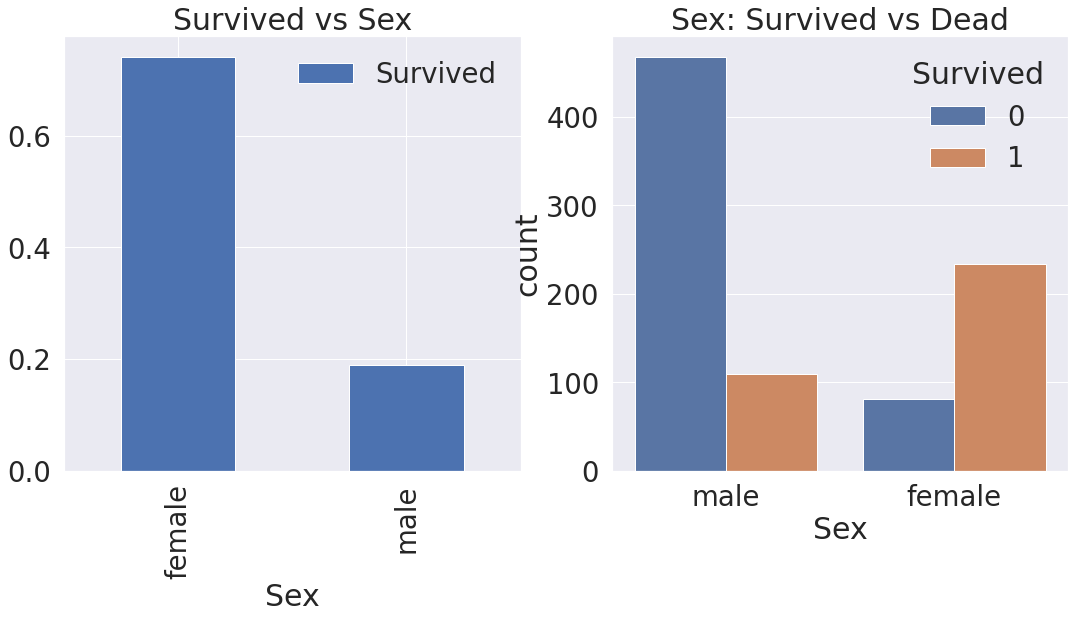

In [16]:
f, ax = plt.subplots(1, 2, figsize=(18, 8)) # 캔버스 크기 조정
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0]) # ①pandas 그래프
ax[0].set_title('Survived vs Sex')
# ①그래프는 남자와 여자의 절대 생존자 수를 비교
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1]) # ② seaborn 그래프
ax[1].set_title('Sex: Survived vs Dead')
# ②그래프는 각 남자와 여자의 생존률을 비교
plt.show()

### 2.3 Both Sex and Pclass
target과 상관성이 있는 features를 함께 적용하면?

```python
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, 
               size=6, aspect=1.5)
```
⇒ 이로써 모든 Pclass에서 여성(female)이 남성(male)보다 생존에 유리함을 알 수 있다.


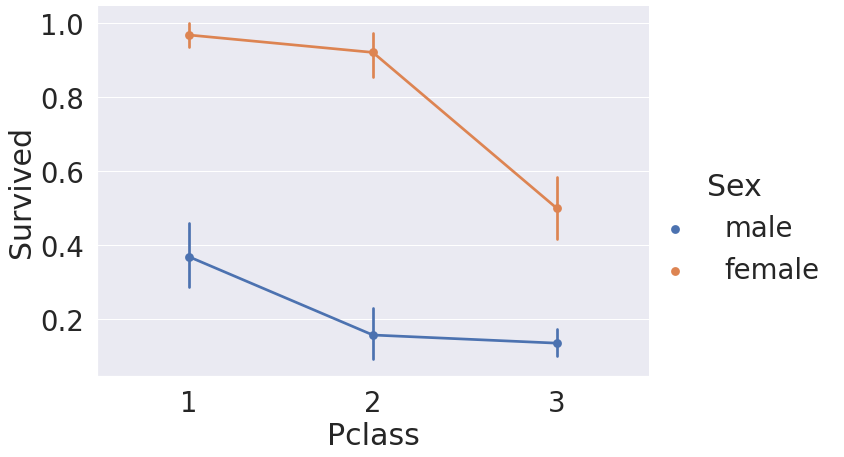

In [24]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, 
               size=6, aspect=1.5)

### 2.4 Age
기본적인 나이에 대한 정보는
```python
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))
>>> 제일 나이 많은 탑승객 : 80.0 Years
>>> 제일 어린 탑승객 : 0.4 Years
>>> 탑승객 평균 나이 : 29.7 Years
```
⇒ 최대 나이가 80, 최소 나이가 1살이라는 점을 고려

- 나이에 따른 생존률 그래프
```python
# histogram
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()
```
⇒ 어린 나이(약 15세 미만) 구간에서 생존률이 상대적으로 높음을 확인. (= 생존 수 > 사망수)
    ```python
    # cummulative ratio
    cummulate_survival_ratio = []
    for i in range(1, 80): # 모든 나이가 (1~80)에 분포하므로
        cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
        
    plt.figure(figsize=(7, 7))
    plt.plot(cummulate_survival_ratio)
    plt.title('Survival rate change depending on range of Age', y=1.02)
    plt.ylabel('Survival rate')
    plt.xlabel('Range of Age(0~x)')
    plt.show()

    ```
> **내생각**: for문 수행할 때 ≤이렇게 해야 되지 않나?
- Pclass에 따른 나이 분포도
    ```python
    # Age distribution withing classes
    plt.figure(figsize=(8, 6))
    df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
    df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
    df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

    plt.xlabel('Age')
    plt.title('Age Distribution within classes')
    plt.legend(['1st Class', '2nd Class', '3rd Class'])
    ```
⇒ 클래스가 높을 수록 나이 연령대도 높아짐을 확인

∴ 지금까지의 분석 결과:
- 여자라면
- 나이가 어릴 수록
- 클래스가 높을수록 (1st Class일수록)  
생존확률이 높다.

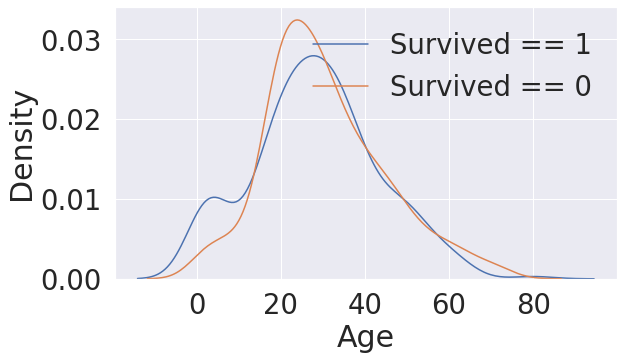

In [27]:
# histogram
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

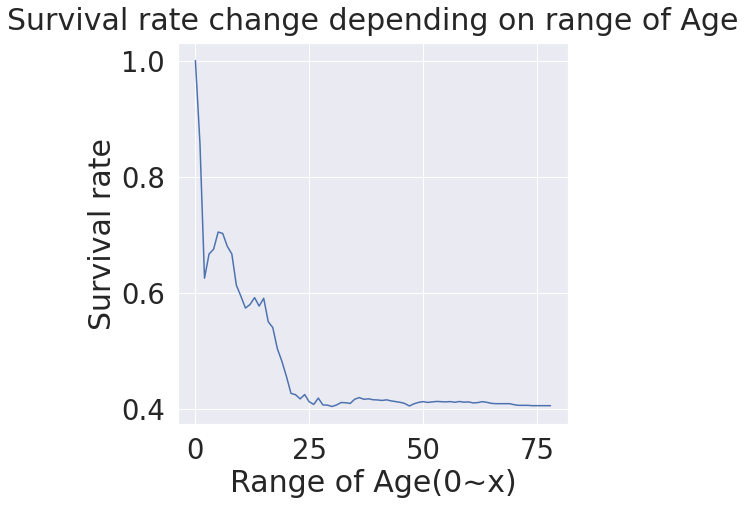

In [28]:
# cummulative ratio
cummulate_survival_ratio = []
for i in range(1, 80): # 모든 나이가 (1~80)에 분포하므로
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

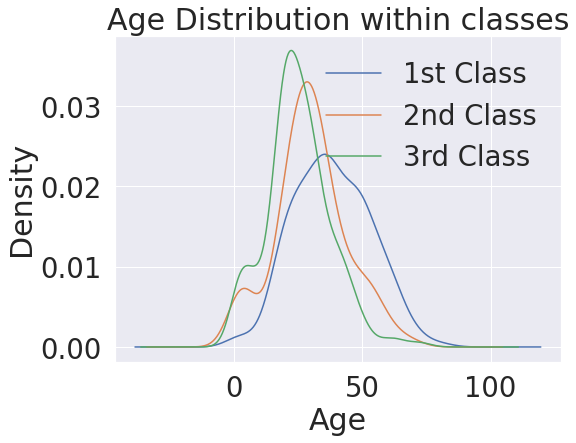

In [29]:
# Age distribution withing classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

### 2.5 Embarked
탑승한 항구
```python
df_train['Embarked'].unique()
>>> ['S', 'C', 'Q', nan]
```

- Embarked만 고려했을 때의 Survived 비율
```python
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)
```
⇒ 탑승한 곳에 따라 생존률에 차이가 있는 것 같다(?) → 더 자세히 살펴볼 것
- 종합적인 분석 (다른 feature 또는 target(상세)와의 관계
```python
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded') # ① Embarked count
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked') # ② 성별에 따른 분포
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived') # ③ Embarked에 따른 생존수, 사망수
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass') # ④ Embarked에 따른 Pclass 분포수
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()
```
⇒ ①: S에서 가장 많이 탑승  
②: S에서는 남자가 많이 탑승, 나머지는 균일  
③: S의 생존확률이 낮음 (아마 남자가 많이 타서 그런거 같음)  
④: ③에서 C의 생존률이 높았던 것은 아마 C에서의 1st class가 많아서 그렇고 S는 3rd class가 많아서 생존률이 낮음을 확인

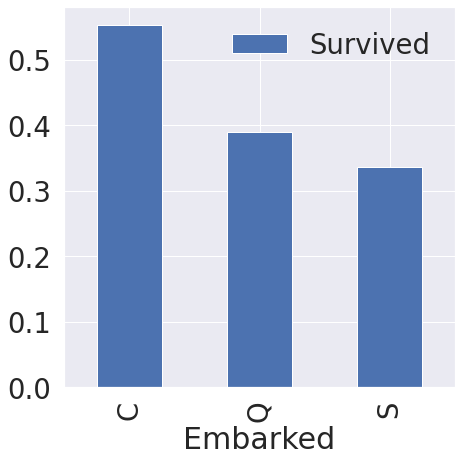

In [30]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

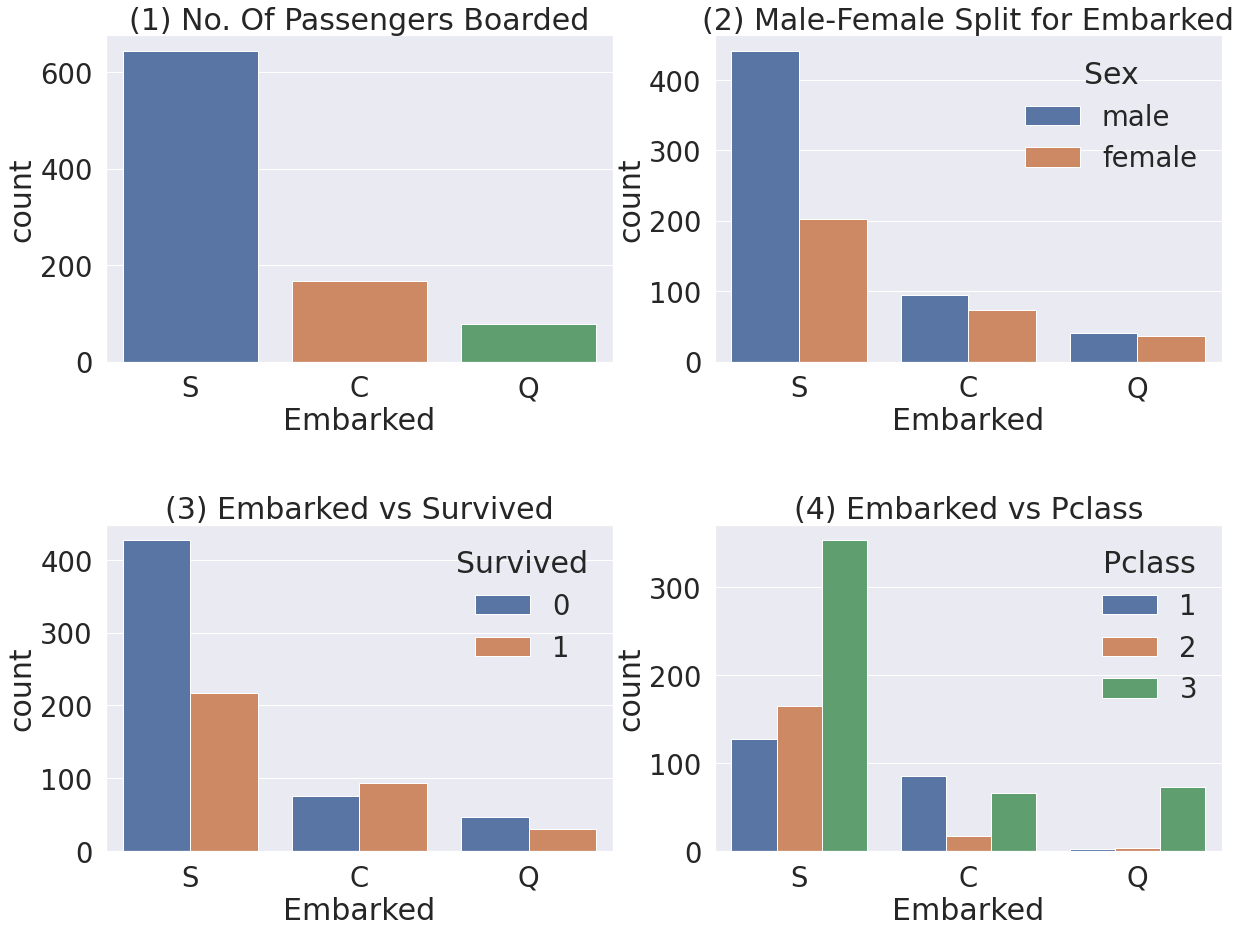

In [31]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded') # ① Embarked count
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked') # ② 성별에 따른 분포
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived') # ③ Embarked에 따른 생존수, 사망수
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass') # ④ Embarked에 따른 Pclass 분포수
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 2.6 Family = SibSp + Parch
함께 탑승한 가족 수 = 형제 자매 수 + 부모, 자녀 수

> **내 생각**: 서로 같은 가족일때는 분석에 영향을 미칠 까? (다시 말해 같은 가족 수가 많을 수록 가족에 대한 데이터로서는 중복 데이터가 더 많이 존재할 거라고 본다.) → 아마 특성 공학쪽에서 다루지 않을 까?  
>  
> 또한 가족이 있어야만 생존에 유리한지는조금 의구심 (동료일 수도 있고, 친구일 수도 있고, 만일 희생정신을 발휘했을 때 단순히 가족보다는 약자를 먼저 살리려는 사회적 약속이 작용 되었을 수도?)

```python
# Family Size라는 새로운 column 추가
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
```
```python
print("Maximum size of Family: ", df_train['FamilySize'].max())
>>> Maximum size of Family:  11
print("Minimum size of Family: ", df_train['FamilySize'].min())
>>> Minimum size of Family:  1
```

- 가족의 최소 ~ 최대 크기 분포  
⇒ 대부분 1인 승객임을 확인
- 가족 크기별 생존률 분포
- 생존률  
⇒ 3, 4인 가족의 경우 생존 확률 좀 더 높음

In [32]:
# Family Size라는 새로운 column 추가
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

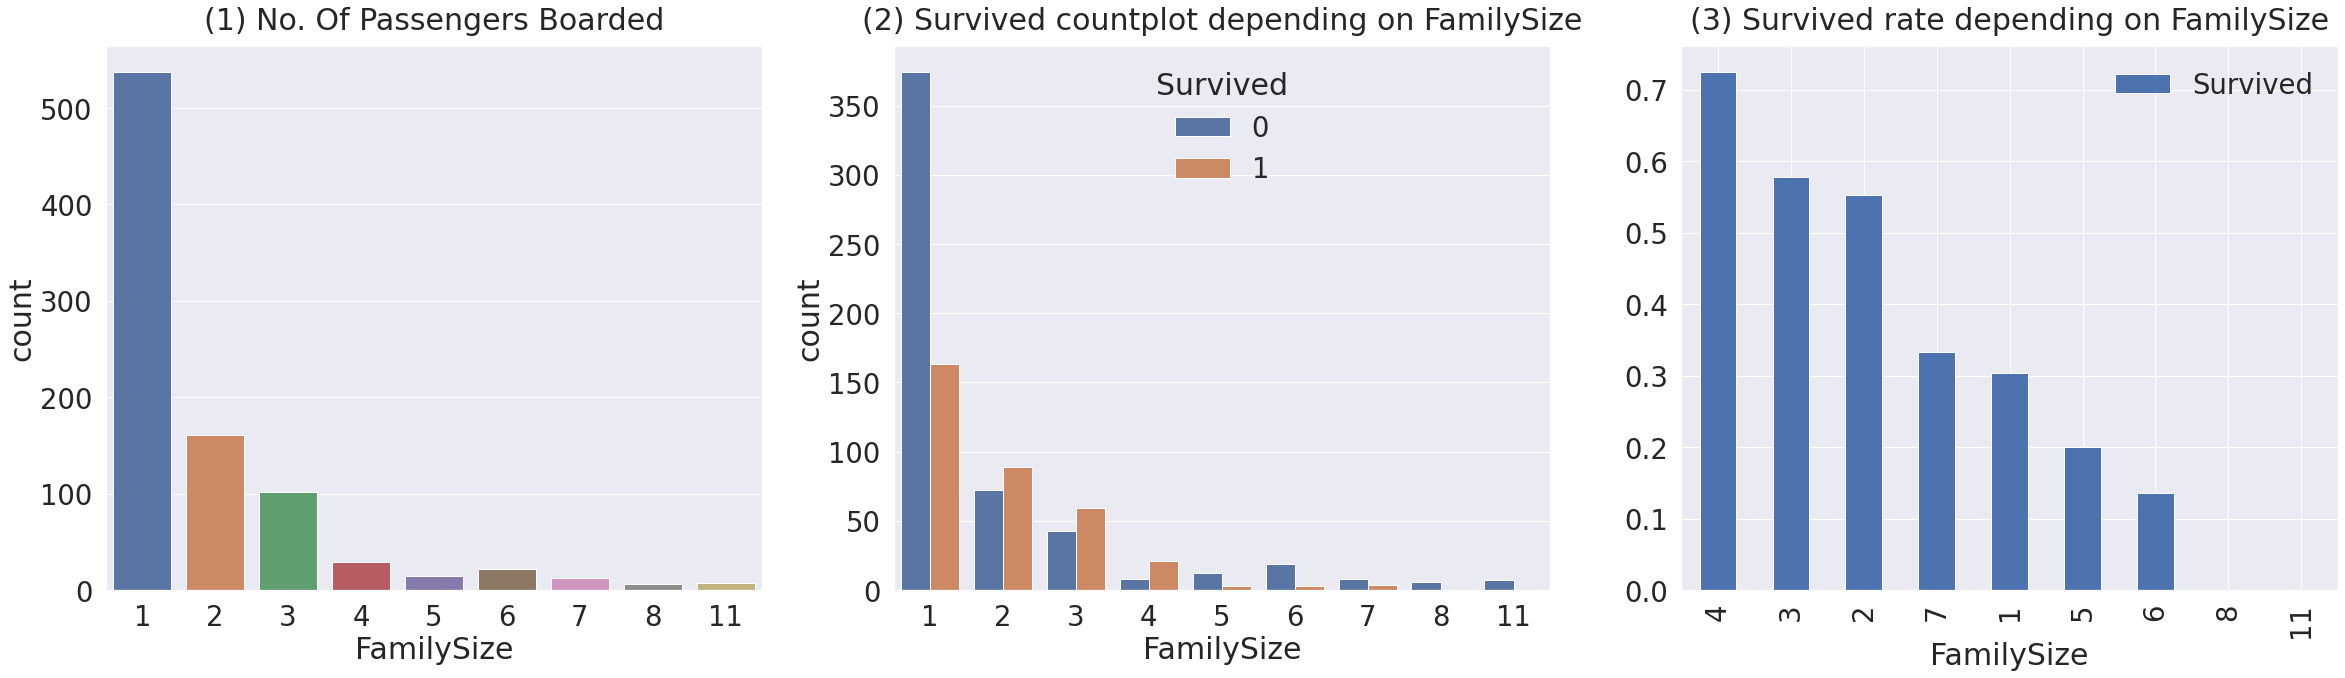

In [33]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02) # y는 단순 위치 같음
# ① 가족의 최소 ~ 최대 크기 분포

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)
# ② 가족 크기별 생존률 분포

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)
# ③생존률 

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 2.7 Fare
탑승요금. 연속형 데이터 → histogram이 제격

※ skew(): 표본 비대칭 정도 (+: 오른쪽으로 늘어짐, -: 왼쪽으로 늘어짐, -0.5 ~ 0.5: 적절히 대칭이라고 판단)

만약 너무 비대칭성이 강한 그래프를 그리고 있다면 데이터에 log를 취한다 던지 등의 방법으로 <u>모델의 성능을 높이기 위한 조작</u>을 하기도 한다 → **feature engineering** 작업이다

∴ 4.79 → 0.04로 skewness가 줄어듦을 확인할 수 있다.


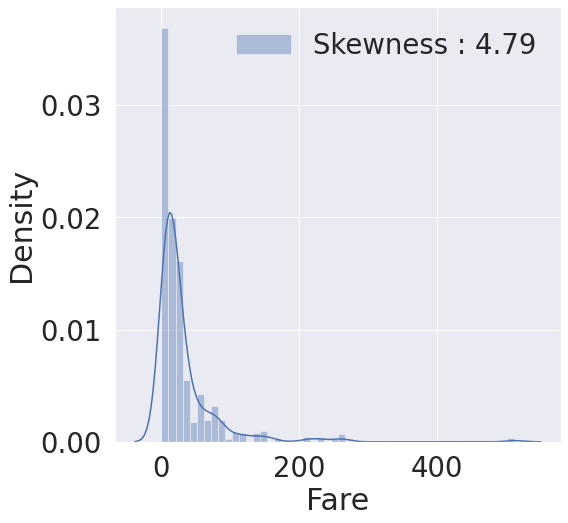

In [34]:
# train data

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

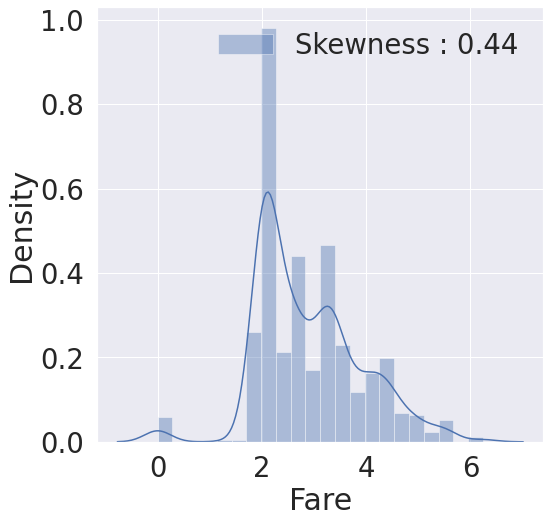

In [35]:
# test data

# 특이하기도 train set 말고 test set에 Fare 피쳐에 널 값이 하나 존재하는 것을 확인할 수 있었습니다.
# 그래서 평균 값으로 해당 널값을 넣어줍니다.
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # testset 에 있는 nan value 를 평균값으로 치환합니다.

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0) # log를 취하므로써 비대칭성을 조정 → 원래는 feature engineering 에서 다룸
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

### 2.8 Cabin
feature의 NaN 값이 약 80% 
```python
### Cabin 피쳐의 Null 비율 계산
df_train["Cabin"].isnull().sum() / df_train.shape[0]
>>> 0.7710437710437711
```
생존에 영향을 미치지 않을 수도 있다고 판단되어 모델에 포함하지 않기로 함
> **내생각**: NaN의 비율이 많기는 하지만 NaN이 많이 나올 수 밖에 없었던 경위라든지, 값이 존재하는 경우 어떤 의미를 갖는 지 좀 더 유심히 살필 필요가 있다고 본다. Starter Course에서 결측치 처리 방법 중 1. Drop 방식과 2. Imputation 방식이 있다고 배웠는데 Drop방식은 어쩌면 중요한 정보를 버리는 리스크를 품을 수 있다고 배웠기 때문이다.


### 2.9 Ticket
NaN 값은 없지만 string data이고 분석가가 추가작업을 해줘야 되는 feature
```python
df_train['Ticket'].value_counts()
```
|||
|:---|---:|
|CA. 2343|7|
|1601|7|
|347082|7|
| ...|...|

⇒ 매우 다양하다. 생존과 연관되어 있을 까? 모델 성능 향상을 위해새로운 feature을 만들어야할 가치가 있나? 고민해봐야 함

---
## 3. 특성 공학(Feature Engineering)

"Garbage In, Garbage Out"  
쓰레기가 들어가면 쓰레기가 나옴. (입력값 자체를 좋게 (데이터 정제)해야 출력값(모델 성능)도 좋게 나온다
  
<br>
생각했던 가정이 타당한가?

### 3.1 Fill Null
#### 3.1.1 Fill in Age using title
**결측치 확인**
```python
df_train["Age"].isnull().sum()
>>> 177
```
⇒ Null data가 177개. 그냥 mean으로 채워야 될까?

**결측치 처리 방안 연구**

∴ (Name)title + statistics 이용하여 더 설득력 있는 결측치 처리 진행
```python
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
```
⇒ 정규 표현식에 의해 Mr., Miss., Mrs. 같은 title추출 가능
```python
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex
```
⇒ 항상 test data는 unseen으로 둔 상태로 놔둬야 하기 때문에 train에서 얻은 statistics를 기반으로 test의 null값을 채워야 한다.
> **내생각**: other의 기준은 무엇이며 ('Jonkheer','Col','Rev'가 해당), Dr.의 경우 female과 male 두분류 모두 존재하는 데 왜 other가 아니라 'Mr'로 표기 되었을까?

```python
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)
```
```python
df_train.groupby('Initial').mean()
df_train.groupby('Initial').mean()
```
```python
df_train.groupby('Initial')['Survived'].mean().plot.bar()
```

**Imputation (by mean groupby Age)**
``` python
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46
```
> **내생각**: 숫자들은 for문과 df_train[df_train.Initail=='Mr']['Age'].mean() 이런식으로 채워주면 깔끔할 것 같다.

**데이터 확인**
```python
df_train.isnull().sum()[df_train.isnull().sum() > 0]
df_test.isnull().sum()[df_train.isnull().sum() > 0]
```

In [36]:
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [37]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [38]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)
 
df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [40]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [41]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


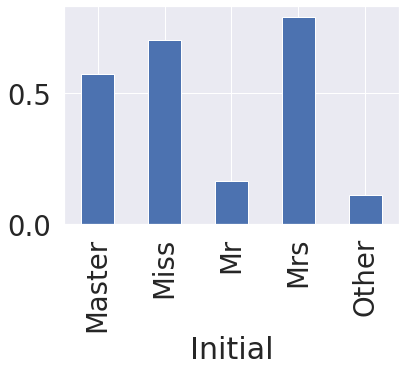

In [42]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [43]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46
 
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

#### 3.1.2 Fill Null in Embarked
```python
sum(df_train['Embarked'].isnull())
>>> 2
```

아주 적은 정도의 결측치만 있고 가장 분포가 많이 되었던 탑승 장소가 'S'였으므로 'S'로 채워넣음
> **내생각**: 간단한 결측치에 대해선 결측치 처리 노력 대비 시간 단축을 위함인가 봄

```python
df_train['Embarked'].fillna('S', inplace=True) # DataFrame.fillna로 간단하게 Imputation 가능
```
** 데이터 확인**
```python
df_train.isnull().sum()[df_train.isnull().sum() > 0]
```
⇒ Cabin 칼럼에 아직 Null값이 존재하나 모델에 포함하지 않기로 한 데이터이므로 처리하지 않음

In [44]:
df_train['Embarked'].fillna('S', inplace=True) # DataFrame.fillna로 간단하게 Imputation 가능

### 3.2 Change Age (continuous to categorical)
Age는 연속형 데이터이다. 하지만 10대 20대 처럼 연령대로 나누어 범주형으로 만들수도 있다.
※ 단, continuous → categorical로 바꾸면 자칫 **information loss**가 생길 수 있다는 위험이 있음

파생 featue 이므로 원래의 feature인 Age column을 제거하는 게 맞음

In [45]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)

df_train.groupby(['Age_cat'])['PassengerId'].count()

Age_cat
0     66
1    102
2    256
3    304
4     89
5     48
6     19
7      7
Name: PassengerId, dtype: int64

### 3.3 Change Initial, Embarked and Sex (str → numerical)

확인용 (ex.Embarked)
```python
df_train['Embarked'].isnull().any() , df_train['Embarked'].dtypes
>>> (False, dtype('int64'))
```

In [46]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

모든 변수가 수치형이므로 feature간의 상관관계를 확인 해 볼 수 있음.

- -1일수록 음의 상관 관계
- 1일수록 양의 상관 관계
- 0일수록 상관관계가 없음

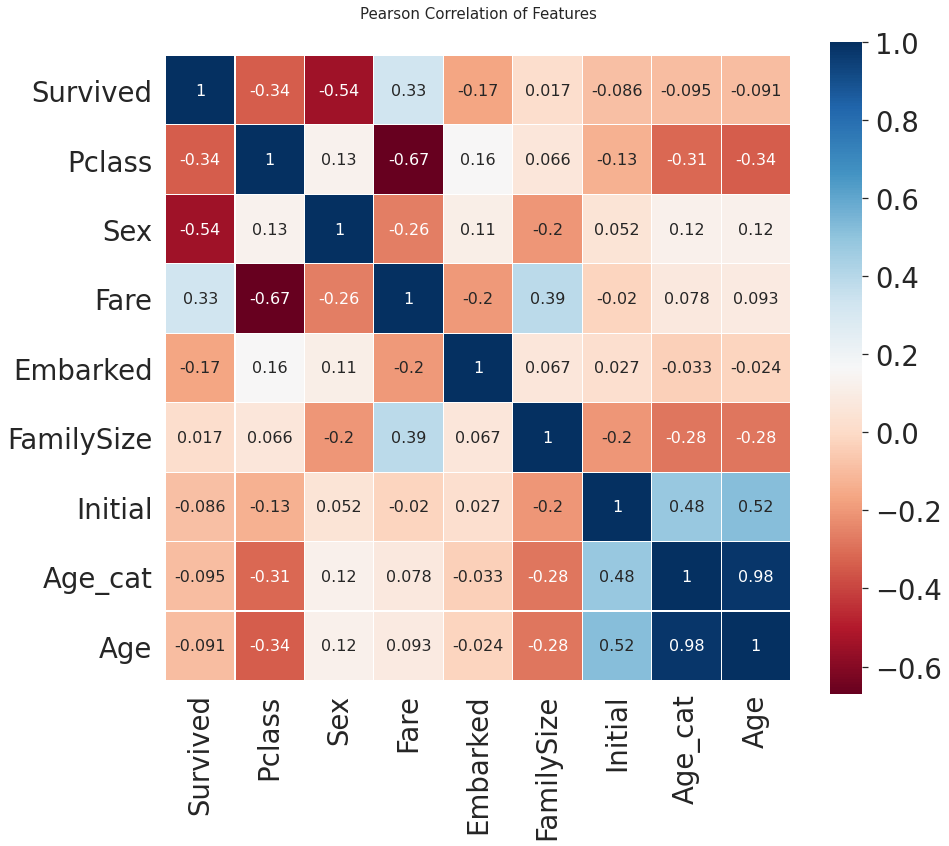

In [47]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat', 'Age']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data # 강제 garbage collection

⇒ EDA에서 살펴 봤듯이 Sex & Pclass가 Survived에 어느정도 상관관계가 있음을 확인
⇒ Fare도 어느정도 약한 상관 관계를 가지고 있음
⇒ 서로 강한 상관 관계를 가지는 feature없음(파생 feature제외) → 이 말은 모델 학습을 위해 불필요한 feature 제거 작업을 안해도 된다는 뜻

### 3.4 One-hot encoding
**데이터 전처리 (data preprocessing)**과정.  
Initial 과 Embarked 같은 경우 수치화 시킨 카테고리 데이터를 그대로 학습시켜도 되지만 one-hot encoding 작업을 통해 모델 성능을 향상 시킬 수 있음 (≤10 ~ 15)
> **중요한 정보**:  
label Encoding → 변수에 해당되는 데이터가 순서가 있을 때 유용  
One-hot Encoding → 데이터에 순서가 없는 변수에 유용

get_dummies 대신 다음처럼 sklearn 제공 패키지를 이용할 수도 있다.
```python
from sklearn.preprocessing import OneHotEncoder
```

※ [차원의 저주](https://datapedia.tistory.com/15) - 빈공간이 많이 늘어나 (판단할 수 있는 데이터가 적어) 모델 성능이 현저하게 떨어짐

In [48]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [49]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

### 3.5 Drop unnecessary columns
예측해야 되는 Survived (target class)를 제외하고는 train과 test columns가 일치한다.

In [52]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

df_train.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
Fare          float64
FamilySize      int64
Age_cat         int64
Initial_0       uint8
Initial_1       uint8
Initial_2       uint8
Initial_3       uint8
Initial_4       uint8
Embarked_0      uint8
Embarked_1      uint8
Embarked_2      uint8
dtype: object

In [54]:
df_test.dtypes

Pclass          int64
Sex             int64
Age           float64
Fare          float64
FamilySize      int64
Age_cat         int64
Initial_0       uint8
Initial_1       uint8
Initial_2       uint8
Initial_3       uint8
Initial_4       uint8
Embarked_0      uint8
Embarked_1      uint8
Embarked_2      uint8
dtype: object

# 4부터 다시 시작...